Problem Statement Scenario:

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

I will Take below approach for Problem Statement

1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
2. Check for null and unique values for test and train sets.
3. Apply label encoder for non-numerical categorical variables.
4. Use Boruta for dimensionality reduction since PCA is not suitable on binary and categorical variable.
5. Use XGBoost for final modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max.columns", None)

In [2]:
# Importing Data Set
traindata = pd.read_csv('train.csv')
testdata = pd.read_csv('test.csv')

In [3]:
#Creating Variables for Identificaton of Data.
testdata['Type'] = "Test"
traindata['Type'] = "train"

#Merging Data Set
mergeddata = (pd.concat([traindata, testdata], ignore_index= True))

 ## EDA for Train Dataset

In [4]:
traindata.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,Type
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,train
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,train
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0

In [5]:
traindata.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.0000

In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 379 entries, ID to Type
dtypes: float64(1), int64(369), object(9)
memory usage: 12.2+ MB


In [7]:
traindata.shape

(4209, 379)

In [8]:
traindata.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X382    0
X383    0
X384    0
X385    0
Type    0
Length: 379, dtype: int64

In [9]:
traindata.isnull().values.any()

False

In [10]:
traindata.isnull().any().sum()

0

In [11]:
traindata.isna().any()

ID      False
y       False
X0      False
X1      False
X2      False
        ...  
X382    False
X383    False
X384    False
X385    False
Type    False
Length: 379, dtype: bool

In [12]:
## ID not seems relevant data, it seems a like serial number of records, so dropping it.
mergeddata.set_index('ID', inplace=True)

In [13]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 379 entries, ID to Type
dtypes: float64(1), int64(369), object(9)
memory usage: 12.2+ MB


In [14]:
traindata.var()

ID      5.941936e+06
y       1.607667e+02
X10     1.313092e-02
X11     0.000000e+00
X12     6.945713e-02
            ...     
X380    8.014579e-03
X382    7.546747e-03
X383    1.660732e-03
X384    4.750593e-04
X385    1.423823e-03
Length: 370, dtype: float64

In [15]:
testdata.var()

ID      5.871311e+06
X10     1.865006e-02
X11     2.375861e-04
X12     6.885074e-02
X13     5.734498e-02
            ...     
X380    8.014579e-03
X382    8.715481e-03
X383    4.750593e-04
X384    7.124196e-04
X385    1.660732e-03
Length: 369, dtype: float64

## Data PreProcessing

### Question-1 : If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [16]:
# Creating Variance dataframe

Numeric = pd.DataFrame(traindata.var())
Numeric = Numeric.transpose()
Numeric

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,5.941936e+06,160.76671,0.013131,0.0,0.069457,0.054623,0.244893,0.000475,0.002607,0.007547,0.007781,0.08966,0.12243,0.002607,0.079414,0.020248,0.001898,0.004966,0.216714,0.031497,0.041164,0.004495,0.178411,0.011044,0.000238,0.005436,0.178411,0.004495,0.178411,0.032163,0.000238,0.000712,0.011277,0.000238,0.067025,0.011277,0.189168,0.240592,0.012668,0.02184,0.107232,0.168281,0.200858,0.040511,0.006844,0.041598,0.005201,0.020703,0.013131,0.244439,0.000712,0.001424,0.043978,0.005906,0.011277,0.234468,0.002134,0.026357,0.001898,0.068041,0.029047,0.073673,0.092879,0.019564,0.000712,0.034817,0.041598,0.012436,0.005671,0.024556,0.050187,0.176619,0.016818,0.001187,0.092879,0.241625,0.001424,0.00095,0.007078,0.000712,0.007313,0.001661,0.00095,0.0,0.007313,0.000238,0.183409,0.004259,0.054203,0.008482,0.213879,0.060255,0.006844,0.169095,0.001898,0.002371,0.0129,0.0,0.014517,0.038768,0.00095,0.024556,0.002844,0.02184,0.124795,0.204072,0.15806,0.046773,0.235114,0.235114,0.040511,0.007078,0.002607,0.000475,0.00308,0.037455,0.250036,0.039858,0.107591,0.039858,0.025908,0.214509,0.108843,0.02184,0.026357,0.041598,0.243359,0.039204,0.082346,0.038768,0.014055,0.177005,0.036797,0.155154,0.001424,0.039204,0.02184,0.042898,0.164571,0.078234,0.031275,0.000712,0.165264,0.070667,0.202841,0.202841,0.177005,0.013362,0.001187,0.158635,0.039204,0.211398,0.058595,0.004495,0.032163,0.00095,0.197536,0.00661,0.023652,0.225279,0.005906,0.009648,0.017047,0.02184,0.016818,0.047629,0.246767,0.0457,0.133064,0.08506,0.094945,0.004024,0.001424,0.018421,0.248764,0.243742,0.077445,0.000238,0.249212,0.002371,0.248764,0.011509,0.010114,0.031275,0.02252,0.002844,0.00661,0.146167,0.183163,0.016588,0.000238,0.000238,0.018879,0.000238,0.05901,0.091179,0.000238,0.014747,0.005436,0.001898,0.006844,0.088898,0.005906,0.007313,0.214867,0.062937,0.246316,0.008015,0.02184,0.247007,0.216714,0.08756,0.031275,0.00308,0.037455,0.03833,0.005201,0.015899,0.041164,0.0,0.161062,0.0,0.000475,0.00661,0.076852,0.006844,0.002844,0.087751,0.007313,0.007078,0.092879,0.000712,0.241842,0.183163,0.001424,0.007547,0.247264,0.238854,0.000712,0.001424,0.005201,0.019107,0.067838,0.000238,0.002371,0.000238,0.000238,0.24359,0.001424,0.041164,0.037893,0.085638,0.001424,0.008949,0.

In [17]:
# Dropping variable from combined dataset which have 0 variance in train data set

variables = Numeric.columns
variable = [ ]
numeric = traindata[variables]
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i] == 0:   #setting the threshold as 0
       variable.append(numeric[i])

mergeddata1 = mergeddata.drop(variable,axis=1)
mergeddata1.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X295,X296,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,Type
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,train
6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,train
7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0

In [18]:
##Checking Variance in Test Data
Numeric1 = pd.DataFrame(testdata.var())
Numeric1 = Numeric1.transpose()
Numeric1

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,5.871311e+06,0.01865,0.000238,0.068851,0.057345,0.244859,0.000712,0.002607,0.008715,0.010114,0.09922,0.120042,0.001661,0.075664,0.019792,0.002371,0.008949,0.217233,0.026133,0.037455,0.005436,0.181057,0.010347,0.000712,0.003552,0.181057,0.002844,0.181057,0.030162,0.000712,0.001898,0.011277,0.001424,0.071069,0.006844,0.18858,0.241272,0.011044,0.0232,0.115722,0.173889,0.20397,0.040729,0.005906,0.03833,0.006375,0.02433,0.015438,0.242924,0.001187,0.001661,0.044409,0.005906,0.0129,0.230505,0.001898,0.026357,0.002134,0.073474,0.029716,0.073274,0.096252,0.01865,0.002134,0.037236,0.03833,0.011044,0.007313,0.032163,0.047843,0.171377,0.020248,0.001187,0.096252,0.243742,0.001424,0.00095,0.008248,0.001898,0.008248,0.002607,0.002371,0.000475,0.007781,0.000712,0.188698,0.001424,0.053993,0.009881,0.216453,0.059218,0.005906,0.166917,0.002607,0.000238,0.012205,0.00095,0.011509,0.037893,0.001424,0.02433,0.001187,0.0232,0.123953,0.20757,0.157771,0.042465,0.235114,0.235114,0.040946,0.008248,0.003316,0.000238,0.00473,0.03833,0.249866,0.037016,0.115897,0.037016,0.026582,0.214778,0.108128,0.0232,0.025683,0.038112,0.241885,0.037893,0.0866,0.037893,0.016129,0.179425,0.038112,0.159209,0.000712,0.037893,0.0232,0.038768,0.167054,0.079806,0.030385,0.001187,0.167873,0.073274,0.205988,0.205988,0.179551,0.014517,0.00095,0.157048,0.034376,0.215577,0.063142,0.003552,0.026357,0.001187,0.194218,0.007313,0.026133,0.222354,0.005906,0.010114,0.019107,0.022293,0.014286,0.049123,0.246402,0.043114,0.133389,0.084093,0.088134,0.002134,0.000712,0.017735,0.249038,0.244927,0.072073,0.000238,0.249489,0.001661,0.249053,0.011973,0.012205,0.0286,0.02433,0.001187,0.00661,0.145246,0.1823,0.011741,0.000712,0.000712,0.018421,0.001424,0.05797,0.092314,0.000238,0.016818,0.007078,0.002134,0.005906,0.09774,0.005906,0.008949,0.218088,0.062731,0.246767,0.008248,0.0232,0.246901,0.215223,0.078825,0.030385,0.00473,0.044624,0.046773,0.003788,0.016818,0.038112,0.000238,0.163735,0.000238,0.000238,0.005436,0.072874,0.005906,0.003552,0.093444,0.008248,0.008248,0.096252,0.00095,0.243163,0.182176,0.002134,0.009415,0.246928,0.238803,0.000238,0.001661,0.003788,0.014055,0.070667,0.0,0.0,0.000238,0.000712,0.246199,0.000712,0.038112,0.039204,0.080198,0.00095,0.008015,0.000238,0.

In [19]:
##Dropping variable from combined dataset which have 0 variance in Test Data Set.
variables = Numeric1.columns
variable = [ ]
numeric = testdata[variables]
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i] == 0:   #setting the threshold as 0
       variable.append(numeric[i])

mergeddata2 = mergeddata1.drop(variable,axis=1)
mergeddata2.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,Type
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,train
6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,train
7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0

In [20]:
##Checking Categorical Data in DataFrame for train Data
traindata.describe(include=object)

,X0,X1,X2,X3,X4,X5,X6,X8,Type
count,4209,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25,1
top,z,aa,as,c,d,v,g,j,train
freq,360,833,1659,1942,4205,231,1042,277,4209


##Dropping X4 Variable as it has no variance as value 'd' count is 8408 which is almost 100% of variable

In [21]:
mergeddata3 = mergeddata2.drop('X4',axis=1)
mergeddata3.head()

,y,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,Type
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,u,j,o,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,train
6,88.53,k,t,av,e,y,l,o,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,train
7,76.26,az,w,n,c,x,j,x,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0

In [22]:
##Checking Categorical Data in DataFrame for Test Data
testdata.describe(include=object)

,X0,X1,X2,X3,X4,X5,X6,X8,Type
count,4209,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25,1
top,ak,aa,as,c,d,v,g,e,Test
freq,432,826,1658,1900,4203,246,1073,274,4209


#Another variables has variation except X4 and it has already removed during checking of Traning Data Variance for Categorical Data

In [23]:
FinalData = mergeddata3.copy()
FinalData.head()

,y,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,Type
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,u,j,o,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,train
6,88.53,k,t,av,e,y,l,o,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,train
7,76.26,az,w,n,c,x,j,x,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0

### Question-2 : Check for null and unique values for test and train sets.

In [24]:
traindata.isna().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X382    0
X383    0
X384    0
X385    0
Type    0
Length: 379, dtype: int64

In [25]:
traindata.isnull().sum().sum()

0

In [26]:
testdata.isna().sum()

ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X382    0
X383    0
X384    0
X385    0
Type    0
Length: 378, dtype: int64

In [27]:
testdata.isnull().sum().sum()

0

##Checking Categorical Value availablity between train and test data.

In [28]:
#Feature X0
X0Check = np.where(testdata.X0.isin(traindata.X0),'Match', traindata.X0)
X0Check = pd.Series(X0Check)
X0Check.value_counts()

Match    4203
f           3
ak          1
z           1
n           1
dtype: int64

In [29]:
#Feature X1
X1Check = np.where(testdata.X1.isin(traindata.X1),'Match', traindata.X1)
X1Check = pd.Series(X1Check)
X1Check.value_counts()

Match    4209
dtype: int64

In [30]:
#Feature X2
X2Check = np.where(testdata.X2.isin(traindata.X2),'Match', traindata.X2)
X2Check = pd.Series(X2Check)
X2Check.value_counts()

Match    4195
as          7
ae          3
m           1
n           1
t           1
ai          1
dtype: int64

In [31]:
#Feature X3
X3Check = np.where(testdata.X3.isin(traindata.X3),'Match', traindata.X3)
X3Check = pd.Series(X3Check)
X3Check.value_counts()

Match    4209
dtype: int64

In [32]:
#Feature X5
X5Check = np.where(testdata.X5.isin(traindata.X5),'Match', traindata.X5)
X5Check = pd.Series(X5Check)
X5Check.value_counts()

Match    4205
x           2
u           1
y           1
dtype: int64

In [33]:
#Feature X6
X6Check = np.where(testdata.X6.isin(traindata.X6),'Match', traindata.X6)
X6Check = pd.Series(X6Check)
X6Check.value_counts()

Match    4209
dtype: int64

In [34]:
#Feature X8
X8Check = np.where(testdata.X8.isin(traindata.X8),'Match', traindata.X8)
X8Check = pd.Series(X8Check)
X8Check.value_counts()

Match    4209
dtype: int64

##All Level are available in train data which is in test data except few ones which has low occurrance. hence we will leave it as is.

In [35]:
##Frequency observation of categorical column.

for column in traindata.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=traindata[column], columns='Observations%', normalize='columns')*100)   

col_0,Observations%
X0,
a,0.498931
aa,0.047517
ab,0.023759
ac,0.023759
ad,0.332621
af,0.831551
ai,0.807793
aj,3.587550
ak,8.291756


col_0,Observations%
X1,
a,3.397482
aa,19.790924
ab,0.071276
b,14.065099
c,2.874792
d,0.071276
e,0.784034
f,0.546448
g,0.142552


col_0,Observations%
X2,
a,1.116655
aa,0.023759
ac,0.308862
ae,11.784272
af,0.023759
ag,0.451414
ah,0.095034
ai,9.859824
ak,6.296032


col_0,Observations%
X3,
a,10.453789
b,1.354241
c,46.139225
d,6.889998
e,3.872654
f,25.564267
g,5.725826


col_0,Observations%
X4,
a,0.047517
b,0.023759
c,0.023759
d,99.904966


col_0,Observations%
X5,
aa,2.660965
ab,4.680447
ac,4.751722
ad,4.395343
ae,4.870516
af,4.466619
ag,4.846757
ah,2.304585
c,3.112378


col_0,Observations%
X6,
a,4.894274
b,0.665241
c,0.902827
d,14.849133
e,0.285103
f,0.475172
g,24.756474
h,4.514136
i,11.594203


col_0,Observations%
X8,
a,4.989309
b,4.514136
c,2.375861
d,2.447137
e,5.345688
f,5.773343
g,3.088620
h,2.779758
i,5.630791


col_0,Observations%
Type,
train,100.0


#By looking the data, all input feature has sufficient variance.

In [36]:
##Frequency observation of numerical(binary) columns.

for column in traindata.select_dtypes(include=['int64']).columns:
    display(pd.crosstab(index=traindata[column], columns='Observations%', normalize='columns')*100)   

col_0,Observations%
ID,
0,0.023759
6,0.023759
7,0.023759
9,0.023759
13,0.023759
...,...
8405,0.023759
8406,0.023759
8412,0.023759


col_0,Observations%
X10,
0,98.669518
1,1.330482


col_0,Observations%
X11,
0,100.0


col_0,Observations%
X12,
0,92.492278
1,7.507722


col_0,Observations%
X13,
0,94.202899
1,5.797101


col_0,Observations%
X14,
0,57.18698
1,42.81302


col_0,Observations%
X15,
0,99.952483
1,0.047517


col_0,Observations%
X16,
0,99.738655
1,0.261345


col_0,Observations%
X17,
0,99.239724
1,0.760276


col_0,Observations%
X18,
0,99.215966
1,0.784034


col_0,Observations%
X19,
0,90.045141
1,9.954859


col_0,Observations%
X20,
0,85.721074
1,14.278926


col_0,Observations%
X21,
0,99.738655
1,0.261345


col_0,Observations%
X22,
0,91.304348
1,8.695652


col_0,Observations%
X23,
0,97.933001
1,2.066999


col_0,Observations%
X24,
0,99.809931
1,0.190069


col_0,Observations%
X26,
0,99.501069
1,0.498931


col_0,Observations%
X27,
0,31.741506
1,68.258494


col_0,Observations%
X28,
0,96.74507
1,3.25493


col_0,Observations%
X29,
0,95.699691
1,4.300309


col_0,Observations%
X30,
0,99.548586
1,0.451414


col_0,Observations%
X31,
0,76.764077
1,23.235923


col_0,Observations%
X32,
0,98.883345
1,1.116655


col_0,Observations%
X33,
0,99.976241
1,0.023759


col_0,Observations%
X34,
0,99.453552
1,0.546448


col_0,Observations%
X35,
0,76.764077
1,23.235923


col_0,Observations%
X36,
0,99.548586
1,0.451414


col_0,Observations%
X37,
0,76.764077
1,23.235923


col_0,Observations%
X38,
0,96.673794
1,3.326206


col_0,Observations%
X39,
0,99.976241
1,0.023759


col_0,Observations%
X40,
0,99.928724
1,0.071276


col_0,Observations%
X41,
0,98.859587
1,1.140413


col_0,Observations%
X42,
0,99.976241
1,0.023759


col_0,Observations%
X43,
0,92.777382
1,7.222618


col_0,Observations%
X44,
0,98.859587
1,1.140413


col_0,Observations%
X45,
0,74.673319
1,25.326681


col_0,Observations%
X46,
0,40.270848
1,59.729152


col_0,Observations%
X47,
0,98.717035
1,1.282965


col_0,Observations%
X48,
0,97.76669
1,2.23331


col_0,Observations%
X49,
0,87.788073
1,12.211927


col_0,Observations%
X50,
0,78.59349
1,21.40651


col_0,Observations%
X51,
0,27.821335
1,72.178665


col_0,Observations%
X52,
0,95.770967
1,4.229033


col_0,Observations%
X53,
0,99.311
1,0.689


col_0,Observations%
X54,
0,95.652174
1,4.347826


col_0,Observations%
X55,
0,99.477311
1,0.522689


col_0,Observations%
X56,
0,97.885483
1,2.114517


col_0,Observations%
X57,
0,98.669518
1,1.330482


col_0,Observations%
X58,
0,42.504158
1,57.495842


col_0,Observations%
X59,
0,99.928724
1,0.071276


col_0,Observations%
X60,
0,99.857448
1,0.142552


col_0,Observations%
X61,
0,4.609171
1,95.390829


col_0,Observations%
X62,
0,99.406035
1,0.593965


col_0,Observations%
X63,
0,98.859587
1,1.140413


col_0,Observations%
X64,
0,62.485151
1,37.514849


col_0,Observations%
X65,
0,99.786172
1,0.213828


col_0,Observations%
X66,
0,97.291518
1,2.708482


col_0,Observations%
X67,
0,99.809931
1,0.190069


col_0,Observations%
X68,
0,92.658589
1,7.341411


col_0,Observations%
X69,
0,97.006415
1,2.993585


col_0,Observations%
X70,
0,8.006652
1,91.993348


col_0,Observations%
X71,
0,89.641245
1,10.358755


col_0,Observations%
X73,
0,98.004277
1,1.995723


col_0,Observations%
X74,
0,0.071276
1,99.928724


col_0,Observations%
X75,
0,96.388691
1,3.611309


col_0,Observations%
X76,
0,95.652174
1,4.347826


col_0,Observations%
X77,
0,98.740794
1,1.259206


col_0,Observations%
X78,
0,99.429793
1,0.570207


col_0,Observations%
X79,
0,97.481587
1,2.518413


col_0,Observations%
X80,
0,5.298171
1,94.701829


col_0,Observations%
X81,
0,77.096698
1,22.903302


col_0,Observations%
X82,
0,98.28938
1,1.71062


col_0,Observations%
X83,
0,99.881207
1,0.118793


col_0,Observations%
X84,
0,89.641245
1,10.358755


col_0,Observations%
X85,
0,59.182704
1,40.817296


col_0,Observations%
X86,
0,99.857448
1,0.142552


col_0,Observations%
X87,
0,99.904966
1,0.095034


col_0,Observations%
X88,
0,99.287242
1,0.712758


col_0,Observations%
X89,
0,99.928724
1,0.071276


col_0,Observations%
X90,
0,99.263483
1,0.736517


col_0,Observations%
X91,
0,99.83369
1,0.16631


col_0,Observations%
X92,
0,99.904966
1,0.095034


col_0,Observations%
X93,
0,100.0


col_0,Observations%
X94,
0,99.263483
1,0.736517


col_0,Observations%
X95,
0,99.976241
1,0.023759


col_0,Observations%
X96,
0,24.186268
1,75.813732


col_0,Observations%
X97,
0,99.572345
1,0.427655


col_0,Observations%
X98,
0,5.749584
1,94.250416


col_0,Observations%
X99,
0,99.14469
1,0.85531


col_0,Observations%
X100,
0,30.981231
1,69.018769


col_0,Observations%
X101,
0,6.438584
1,93.561416


col_0,Observations%
X102,
0,99.311
1,0.689


col_0,Observations%
X103,
0,21.549062
1,78.450938


col_0,Observations%
X104,
0,99.809931
1,0.190069


col_0,Observations%
X105,
0,99.762414
1,0.237586


col_0,Observations%
X106,
0,98.693276
1,1.306724


col_0,Observations%
X107,
0,100.0


col_0,Observations%
X108,
0,98.526966
1,1.473034


col_0,Observations%
X109,
0,95.961036
1,4.038964


col_0,Observations%
X110,
0,99.904966
1,0.095034


col_0,Observations%
X111,
0,2.518413
1,97.481587


col_0,Observations%
X112,
0,99.714897
1,0.285103


col_0,Observations%
X113,
0,97.76669
1,2.23331


col_0,Observations%
X114,
0,85.388453
1,14.611547


col_0,Observations%
X115,
0,71.442148
1,28.557852


col_0,Observations%
X116,
0,80.327869
1,19.672131


col_0,Observations%
X117,
0,95.081967
1,4.918033


col_0,Observations%
X118,
0,37.776194
1,62.223806


col_0,Observations%
X119,
0,37.776194
1,62.223806


col_0,Observations%
X120,
0,4.229033
1,95.770967


col_0,Observations%
X122,
0,99.287242
1,0.712758


col_0,Observations%
X123,
0,99.738655
1,0.261345


col_0,Observations%
X124,
0,99.952483
1,0.047517


col_0,Observations%
X125,
0,99.691138
1,0.308862


col_0,Observations%
X126,
0,96.103588
1,3.896412


col_0,Observations%
X127,
0,50.487052
1,49.512948


col_0,Observations%
X128,
0,4.157757
1,95.842243


col_0,Observations%
X129,
0,87.740556
1,12.259444


col_0,Observations%
X130,
0,95.842243
1,4.157757


col_0,Observations%
X131,
0,97.339035
1,2.660965


col_0,Observations%
X132,
0,31.147541
1,68.852459


col_0,Observations%
X133,
0,87.574246
1,12.425754


col_0,Observations%
X134,
0,97.76669
1,2.23331


col_0,Observations%
X135,
0,97.291518
1,2.708482


col_0,Observations%
X136,
0,4.347826
1,95.652174


col_0,Observations%
X137,
0,41.815158
1,58.184842


col_0,Observations%
X138,
0,95.913519
1,4.086481


col_0,Observations%
X139,
0,90.947969
1,9.052031


col_0,Observations%
X140,
0,95.961036
1,4.038964


col_0,Observations%
X141,
0,98.574483
1,1.425517


col_0,Observations%
X142,
0,22.974578
1,77.025422


col_0,Observations%
X143,
0,96.174863
1,3.825137


col_0,Observations%
X144,
0,19.196959
1,80.803041


col_0,Observations%
X145,
0,99.857448
1,0.142552


col_0,Observations%
X146,
0,95.913519
1,4.086481


col_0,Observations%
X147,
0,97.76669
1,2.23331


col_0,Observations%
X148,
0,95.509622
1,4.490378


col_0,Observations%
X150,
0,20.765027
1,79.234973


col_0,Observations%
X151,
0,91.4469
1,8.5531


col_0,Observations%
X152,
0,96.768829
1,3.231171


col_0,Observations%
X153,
0,99.928724
1,0.071276


col_0,Observations%
X154,
0,79.11618
1,20.88382


col_0,Observations%
X155,
0,92.349727
1,7.650273


col_0,Observations%
X156,
0,28.272749
1,71.727251


col_0,Observations%
X157,
0,71.727251
1,28.272749


col_0,Observations%
X158,
0,77.025422
1,22.974578


col_0,Observations%
X159,
0,98.645759
1,1.354241


col_0,Observations%
X160,
0,99.881207
1,0.118793


col_0,Observations%
X161,
0,80.232834
1,19.767166


col_0,Observations%
X162,
0,95.913519
1,4.086481


col_0,Observations%
X163,
0,69.660252
1,30.339748


col_0,Observations%
X164,
0,93.751485
1,6.248515


col_0,Observations%
X165,
0,99.548586
1,0.451414


col_0,Observations%
X166,
0,96.673794
1,3.326206


col_0,Observations%
X167,
0,99.904966
1,0.095034


col_0,Observations%
X168,
0,72.915182
1,27.084818


col_0,Observations%
X169,
0,99.334759
1,0.665241


col_0,Observations%
X170,
0,97.576622
1,2.423378


col_0,Observations%
X171,
0,34.259919
1,65.740081


col_0,Observations%
X172,
0,99.406035
1,0.593965


col_0,Observations%
X173,
0,99.025897
1,0.974103


col_0,Observations%
X174,
0,98.265621
1,1.734379


col_0,Observations%
X175,
0,97.76669
1,2.23331


col_0,Observations%
X176,
0,98.28938
1,1.71062


col_0,Observations%
X177,
0,94.986933
1,5.013067


col_0,Observations%
X178,
0,44.262295
1,55.737705


col_0,Observations%
X179,
0,95.20076
1,4.79924


col_0,Observations%
X180,
0,84.200523
1,15.799477


col_0,Observations%
X181,
0,90.615348
1,9.384652


col_0,Observations%
X182,
0,89.3799
1,10.6201


col_0,Observations%
X183,
0,99.596104
1,0.403896


col_0,Observations%
X184,
0,99.857448
1,0.142552


col_0,Observations%
X185,
0,98.12307
1,1.87693


col_0,Observations%
X186,
0,46.40057
1,53.59943


col_0,Observations%
X187,
0,57.947256
1,42.052744


col_0,Observations%
X189,
0,8.458066
1,91.541934


col_0,Observations%
X190,
0,99.976241
1,0.023759


col_0,Observations%
X191,
0,52.91043
1,47.08957


col_0,Observations%
X192,
0,99.762414
1,0.237586


col_0,Observations%
X194,
0,53.59943
1,46.40057


col_0,Observations%
X195,
0,98.835828
1,1.164172


col_0,Observations%
X196,
0,98.97838
1,1.02162


col_0,Observations%
X197,
0,96.768829
1,3.231171


col_0,Observations%
X198,
0,97.695415
1,2.304585


col_0,Observations%
X199,
0,99.714897
1,0.285103


col_0,Observations%
X200,
0,99.334759
1,0.665241


col_0,Observations%
X201,
0,82.228558
1,17.771442


col_0,Observations%
X202,
0,75.86125
1,24.13875


col_0,Observations%
X203,
0,98.313139
1,1.686861


col_0,Observations%
X204,
0,99.976241
1,0.023759


col_0,Observations%
X205,
0,0.023759
1,99.976241


col_0,Observations%
X206,
0,98.075552
1,1.924448


col_0,Observations%
X207,
0,99.976241
1,0.023759


col_0,Observations%
X208,
0,93.703968
1,6.296032


col_0,Observations%
X209,
0,10.144928
1,89.855072


col_0,Observations%
X210,
0,99.976241
1,0.023759


col_0,Observations%
X211,
0,98.503207
1,1.496793


col_0,Observations%
X212,
0,99.453552
1,0.546448


col_0,Observations%
X213,
0,99.809931
1,0.190069


col_0,Observations%
X214,
0,99.311
1,0.689


col_0,Observations%
X215,
0,90.140176
1,9.859824


col_0,Observations%
X216,
0,99.406035
1,0.593965


col_0,Observations%
X217,
0,99.263483
1,0.736517


col_0,Observations%
X218,
0,68.757425
1,31.242575


col_0,Observations%
X219,
0,93.252554
1,6.747446


col_0,Observations%
X220,
0,43.882157
1,56.117843


col_0,Observations%
X221,
0,99.192207
1,0.807793


col_0,Observations%
X222,
0,97.76669
1,2.23331


col_0,Observations%
X223,
0,44.476123
1,55.523877


col_0,Observations%
X224,
0,68.258494
1,31.741506


col_0,Observations%
X225,
0,90.306486
1,9.693514


col_0,Observations%
X226,
0,96.768829
1,3.231171


col_0,Observations%
X227,
0,99.691138
1,0.308862


col_0,Observations%
X228,
0,96.103588
1,3.896412


col_0,Observations%
X229,
0,3.991447
1,96.008553


col_0,Observations%
X230,
0,99.477311
1,0.522689


col_0,Observations%
X231,
0,98.384414
1,1.615586


col_0,Observations%
X232,
0,95.699691
1,4.300309


col_0,Observations%
X233,
0,100.0


col_0,Observations%
X234,
0,79.828938
1,20.171062


col_0,Observations%
X235,
0,100.0


col_0,Observations%
X236,
0,99.952483
1,0.047517


col_0,Observations%
X237,
0,99.334759
1,0.665241


col_0,Observations%
X238,
0,8.38679
1,91.61321


col_0,Observations%
X239,
0,99.311
1,0.689


col_0,Observations%
X240,
0,99.714897
1,0.285103


col_0,Observations%
X241,
0,90.282727
1,9.717273


col_0,Observations%
X242,
0,99.263483
1,0.736517


col_0,Observations%
X243,
0,99.287242
1,0.712758


col_0,Observations%
X244,
0,89.641245
1,10.358755


col_0,Observations%
X245,
0,99.928724
1,0.071276


col_0,Observations%
X246,
0,59.063911
1,40.936089


col_0,Observations%
X247,
0,75.86125
1,24.13875


col_0,Observations%
X248,
0,99.857448
1,0.142552


col_0,Observations%
X249,
0,99.239724
1,0.760276


col_0,Observations%
X250,
0,44.713709
1,55.286291


col_0,Observations%
X251,
0,60.584462
1,39.415538


col_0,Observations%
X252,
0,99.928724
1,0.071276


col_0,Observations%
X253,
0,99.857448
1,0.142552


col_0,Observations%
X254,
0,99.477311
1,0.522689


col_0,Observations%
X255,
0,98.051794
1,1.948206


col_0,Observations%
X256,
0,92.682347
1,7.317653


col_0,Observations%
X257,
0,99.976241
1,0.023759


col_0,Observations%
X258,
0,99.762414
1,0.237586


col_0,Observations%
X259,
0,99.976241
1,0.023759


col_0,Observations%
X260,
0,99.976241
1,0.023759


col_0,Observations%
X261,
0,58.04229
1,41.95771


col_0,Observations%
X262,
0,99.857448
1,0.142552


col_0,Observations%
X263,
0,4.300309
1,95.699691


col_0,Observations%
X264,
0,96.05607
1,3.94393


col_0,Observations%
X265,
0,9.455928
1,90.544072


col_0,Observations%
X266,
0,99.857448
1,0.142552


col_0,Observations%
X267,
0,99.097173
1,0.902827


col_0,Observations%
X268,
0,100.0


col_0,Observations%
X269,
0,99.952483
1,0.047517


col_0,Observations%
X270,
0,99.976241
1,0.023759


col_0,Observations%
X271,
0,99.786172
1,0.213828


col_0,Observations%
X272,
0,96.246139
1,3.753861


col_0,Observations%
X273,
0,27.987646
1,72.012354


col_0,Observations%
X274,
0,99.002138
1,0.997862


col_0,Observations%
X275,
0,27.322404
1,72.677596


col_0,Observations%
X276,
0,96.151105
1,3.848895


col_0,Observations%
X277,
0,99.857448
1,0.142552


col_0,Observations%
X278,
0,99.952483
1,0.047517


col_0,Observations%
X279,
0,95.699691
1,4.300309


col_0,Observations%
X280,
0,99.976241
1,0.023759


col_0,Observations%
X281,
0,99.738655
1,0.261345


col_0,Observations%
X282,
0,99.596104
1,0.403896


col_0,Observations%
X283,
0,85.934901
1,14.065099


col_0,Observations%
X284,
0,95.88976
1,4.11024


col_0,Observations%
X285,
0,79.425042
1,20.574958


col_0,Observations%
X286,
0,94.535519
1,5.464481


col_0,Observations%
X287,
0,98.408173
1,1.591827


col_0,Observations%
X288,
0,99.976241
1,0.023759


col_0,Observations%
X289,
0,100.0


col_0,Observations%
X290,
0,100.0


col_0,Observations%
X291,
0,98.954621
1,1.045379


col_0,Observations%
X292,
0,99.097173
1,0.902827


col_0,Observations%
X293,
0,100.0


col_0,Observations%
X294,
0,87.50297
1,12.49703


col_0,Observations%
X295,
0,99.976241
1,0.023759


col_0,Observations%
X296,
0,99.976241
1,0.023759


col_0,Observations%
X297,
0,100.0


col_0,Observations%
X298,
0,99.548586
1,0.451414


col_0,Observations%
X299,
0,99.548586
1,0.451414


col_0,Observations%
X300,
0,79.306249
1,20.693751


col_0,Observations%
X301,
0,95.319553
1,4.680447


col_0,Observations%
X302,
0,98.859587
1,1.140413


col_0,Observations%
X304,
0,7.578997
1,92.421003


col_0,Observations%
X305,
0,98.669518
1,1.330482


col_0,Observations%
X306,
0,95.628415
1,4.371585


col_0,Observations%
X307,
0,99.786172
1,0.213828


col_0,Observations%
X308,
0,99.049656
1,0.950344


col_0,Observations%
X309,
0,99.287242
1,0.712758


col_0,Observations%
X310,
0,99.738655
1,0.261345


col_0,Observations%
X311,
0,40.152055
1,59.847945


col_0,Observations%
X312,
0,99.572345
1,0.427655


col_0,Observations%
X313,
0,69.897838
1,30.102162


col_0,Observations%
X314,
0,56.830601
1,43.169399


col_0,Observations%
X315,
0,97.125208
1,2.874792


col_0,Observations%
X316,
0,80.446662
1,19.553338


col_0,Observations%
X317,
0,99.239724
1,0.760276


col_0,Observations%
X318,
0,99.928724
1,0.071276


col_0,Observations%
X319,
0,99.952483
1,0.047517


col_0,Observations%
X320,
0,99.287242
1,0.712758


col_0,Observations%
X321,
0,76.122594
1,23.877406


col_0,Observations%
X322,
0,97.814208
1,2.185792


col_0,Observations%
X323,
0,99.073414
1,0.926586


col_0,Observations%
X324,
0,42.504158
1,57.495842


col_0,Observations%
X325,
0,99.429793
1,0.570207


col_0,Observations%
X326,
0,96.768829
1,3.231171


col_0,Observations%
X327,
0,87.170349
1,12.829651


col_0,Observations%
X328,
0,95.984794
1,4.015206


col_0,Observations%
X329,
0,56.474222
1,43.525778


col_0,Observations%
X330,
0,100.0


col_0,Observations%
X331,
0,94.392967
1,5.607033


col_0,Observations%
X332,
0,99.928724
1,0.071276


col_0,Observations%
X333,
0,97.60038
1,2.39962


col_0,Observations%
X334,
0,53.741981
1,46.258019


col_0,Observations%
X335,
0,99.643621
1,0.356379


col_0,Observations%
X336,
0,87.265384
1,12.734616


col_0,Observations%
X337,
0,48.348776
1,51.651224


col_0,Observations%
X338,
0,99.311
1,0.689


col_0,Observations%
X339,
0,99.976241
1,0.023759


col_0,Observations%
X340,
0,97.76669
1,2.23331


col_0,Observations%
X341,
0,99.192207
1,0.807793


col_0,Observations%
X342,
0,97.76669
1,2.23331


col_0,Observations%
X343,
0,92.159658
1,7.840342


col_0,Observations%
X344,
0,99.14469
1,0.85531


col_0,Observations%
X345,
0,97.76669
1,2.23331


col_0,Observations%
X346,
0,95.248278
1,4.751722


col_0,Observations%
X347,
0,100.0


col_0,Observations%
X348,
0,5.274412
1,94.725588


col_0,Observations%
X349,
0,95.509622
1,4.490378


col_0,Observations%
X350,
0,66.120219
1,33.879781


col_0,Observations%
X351,
0,70.277976
1,29.722024


col_0,Observations%
X352,
0,94.583036
1,5.416964


col_0,Observations%
X353,
0,99.786172
1,0.213828


col_0,Observations%
X354,
0,79.710145
1,20.289855


col_0,Observations%
X355,
0,61.962461
1,38.037539


col_0,Observations%
X356,
0,82.01473
1,17.98527


col_0,Observations%
X357,
0,99.881207
1,0.118793


col_0,Observations%
X358,
0,57.305773
1,42.694227


col_0,Observations%
X359,
0,96.816346
1,3.183654


col_0,Observations%
X360,
0,92.349727
1,7.650273


col_0,Observations%
X361,
0,3.397482
1,96.602518


col_0,Observations%
X362,
0,47.968639
1,52.031361


col_0,Observations%
X363,
0,24.613923
1,75.386077


col_0,Observations%
X364,
0,99.714897
1,0.285103


col_0,Observations%
X365,
0,99.714897
1,0.285103


col_0,Observations%
X366,
0,99.881207
1,0.118793


col_0,Observations%
X367,
0,94.820622
1,5.179378


col_0,Observations%
X368,
0,93.727726
1,6.272274


col_0,Observations%
X369,
0,99.952483
1,0.047517


col_0,Observations%
X370,
0,99.334759
1,0.665241


col_0,Observations%
X371,
0,98.574483
1,1.425517


col_0,Observations%
X372,
0,99.952483
1,0.047517


col_0,Observations%
X373,
0,98.075552
1,1.924448


col_0,Observations%
X374,
0,77.263008
1,22.736992


col_0,Observations%
X375,
0,68.115942
1,31.884058


col_0,Observations%
X376,
0,94.274174
1,5.725826


col_0,Observations%
X377,
0,68.519838
1,31.480162


col_0,Observations%
X378,
0,97.933001
1,2.066999


col_0,Observations%
X379,
0,99.049656
1,0.950344


col_0,Observations%
X380,
0,99.192207
1,0.807793


col_0,Observations%
X382,
0,99.239724
1,0.760276


col_0,Observations%
X383,
0,99.83369
1,0.16631


col_0,Observations%
X384,
0,99.952483
1,0.047517


col_0,Observations%
X385,
0,99.857448
1,0.142552


## Data Seggragation from Merged Data - Train and Test Data

In [37]:
FinalData.head()

,y,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,Type
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,u,j,o,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,train
6,88.53,k,t,av,e,y,l,o,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,train
7,76.26,az,w,n,c,x,j,x,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0

In [38]:
FinalTrainData = FinalData[FinalData['Type']=='train'].drop('Type',axis=1)
FinalTrainData.shape

(4209, 359)

In [39]:
FinalTrainData.head()

,y,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,u,j,o,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,y,l,o,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,76.26,az,w,n,c,x,j,x,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1

In [40]:
FinalTestData = FinalData[FinalData['Type']=='Test'].drop(['y','Type'],axis=1)
FinalTestData.shape

(4209, 358)

In [41]:
FinalTestData.head()

,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,az,v,n,f,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,t,b,ai,a,b,g,y,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,az,v,as,f,a,j,j,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Question-3 : Apply label encoder

In [42]:
# pip install Boruta

In [43]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from boruta import BorutaPy
import xgboost as xgb
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as rsq
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statistics as sts
le = preprocessing.LabelEncoder()

In [44]:
#Apply Lables Encoder on Non-Numerical Categorical Data.

FinalTrainData['X0']=le.fit_transform(FinalTrainData['X0'])

FinalTrainData['X1']=le.fit_transform(FinalTrainData['X1'])

FinalTrainData['X2']=le.fit_transform(FinalTrainData['X2'])

FinalTrainData['X3']=le.fit_transform(FinalTrainData['X3'])

FinalTrainData['X5']=le.fit_transform(FinalTrainData['X5'])

FinalTrainData['X6']=le.fit_transform(FinalTrainData['X6'])

FinalTrainData['X8']=le.fit_transform(FinalTrainData['X8'])

In [45]:
FinalTrainData.head()

,y,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,130.81,32,23,17,0,24,9,14,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,88.53,32,21,19,4,28,11,14,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,76.26,20,24,34,2,27,9,23,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,

In [46]:
##Since after label encoding, categorical feature has higher value in terms of number, which might dominate the model, so Data Scaling is required on Data.

stscale=StandardScaler()

FinalTrainData['X0']=stscale.fit_transform(FinalTrainData[['X0']])

FinalTrainData['X1']=stscale.fit_transform(FinalTrainData[['X1']])

FinalTrainData['X2']=stscale.fit_transform(FinalTrainData[['X2']])

FinalTrainData['X3']=stscale.fit_transform(FinalTrainData[['X3']])

FinalTrainData['X5']=stscale.fit_transform(FinalTrainData[['X5']])

FinalTrainData['X6']=stscale.fit_transform(FinalTrainData[['X6']])

FinalTrainData['X8']=stscale.fit_transform(FinalTrainData[['X8']])

In [47]:
FinalTrainData.head()

,y,X0,X1,X2,X3,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,130.81,0.163012,1.393488,-0.028122,-1.678270,1.292117,0.751787,0.339445,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,88.53,0.163012,1.159021,0.155388,0.620969,1.776974,1.437511,0.339445,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,76.26,-0.710560,1.510721,1.531709,-0.528650,1.655760,0.751787,1.618389,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [48]:
FinalTrainData.shape

(4209, 359)

## Question-4 : Perform dimensionality reduction.

In [49]:
##Preparing data for Feature and Label.

X =FinalTrainData.drop('y', axis=1)
y=FinalTrainData['y']
X.shape,y.shape

((4209, 358), (4209,))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 21) #0.2 ==> 20% data is for testing & 
print("Shape of X_train is " , X_train.shape)
print("Shape of y_train is " , y_train.shape)
print("=====================================")
print("Shape of X_test is " , X_test.shape)
print("Shape of y_test is " , y_test.shape)

Shape of X_train is  (3367, 358)
Shape of y_train is  (3367,)
Shape of X_test is  (842, 358)
Shape of y_test is  (842,)


In [51]:
mymodel=xgb.XGBRegressor()

In [52]:
selfeat=BorutaPy(mymodel, n_estimators='auto', verbose=2, random_state=1)

In [53]:
selfeat.fit(np.array(X),np.array(y))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	358
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	358
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	358
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	358
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	358
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	358
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	358
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	347
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	347
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	347
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	5
Rejected: 	347
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	348
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	348
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	348
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	4
Rejected: 	348
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	4

BorutaPy(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                colsample_bylevel=1, colsample_bynode=1,
                                colsample_bytree=1, gamma=0, gpu_id=-1,
                                importance_type='gain',
                                interaction_constraints='',
                                learning_rate=0.300000012, max_delta_step=0,
                                max_depth=6, min_child_weight=1, missing=nan,
                                monotone_constraints='()', n_estimators=70,
                                n_jobs=8, num_parallel_tree=1,
                                random_state=1668925764, reg_alpha=0,
                                reg_lambda=1, scale_pos_weight=1, subsample=1,
                                tree_method='exact', validate_parameters=1,
                                verbosity=None),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x23AD34F4A40, verbose=2)

In [54]:
#Boruta Result
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                       'Ranking':selfeat.ranking_,
                                    'Support':selfeat.support_})
Feature= selected_rf_features.copy()
Confimred = Feature[Feature['Ranking']==1]#Confirmed
Tentative = Feature[Feature['Ranking']==2]#Tentative
print(Confimred.head(10))
print(Tentative.head())

    Feature  Ranking  Support
24      X29        1     True
110    X118        1     True
118    X127        1     True
178    X189        1     True
222    X236        1     True
245    X261        1     True
290    X314        1     True
291    X315        1     True
   Feature  Ranking  Support
56     X61        2    False


#8 Features has been confimred thru Boruta as Important feature, we will move with these 8 feature for modeling.

In [55]:
#Final Model with with Confirmed Feature
FinData1=FinalTrainData[['y','X189','X315','X314','X118','X261','X29','X127','X236']]

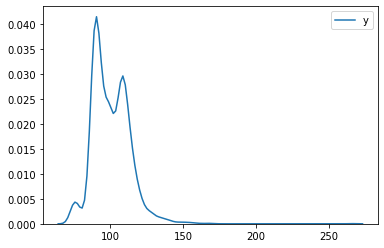

In [56]:
##Target Value Data Distribution Review
sns.kdeplot(FinData1.y)

##By Looking the graph data seems to be skewed, lets check it by stats.

In [57]:
##Stats Checking
print('The Median Value of Target Variable is:',sts.median(FinData1.y))
print('The Mean Value of Target Variable is:',round(sts.mean(FinData1.y),2))
print('The Skewness of Target Variable is:',round(skew(FinData1.y),2))


The Median Value of Target Variable is: 99.15
The Mean Value of Target Variable is: 100.67
The Skewness of Target Variable is: 1.21


##Data seems to be normally distributed as per stats as skewness is below threashold (<3%).

In [58]:
#Creating Train Test Model for XG Booster Model.
X =FinData1.drop('y', axis=1)
y=FinData1['y']
X.shape,y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 21) #0.2 ==> 20% data is for testing & 
print("Shape of X_train is " , X_train.shape)
print("Shape of y_train is " , y_train.shape)
print("=====================================")
print("Shape of X_test is " , X_test.shape)
print("Shape of y_test is " , y_test.shape)

Shape of X_train is  (3367, 8)
Shape of y_train is  (3367,)
Shape of X_test is  (842, 8)
Shape of y_test is  (842,)


In [59]:
##Xgb Model
import random
random.seed(111)
xgb_mymodel = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)


In [60]:
#Fitting the Data
xgb_mymodel.fit(X_train, y_train)

[20:57:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectvie" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1,
             objectvie='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [61]:
##Prediction on Test Data for accuracy
preds = xgb_mymodel.predict(X_test)

In [62]:
#Evalution of Model on Test Data
rmse = np.sqrt(MSE(y_test, preds))
mae=MAE(y_test, preds)
mse = MSE(y_test, preds)
R2SQ=rsq(y_test, preds)
adjRSq = 1 - (1-R2SQ)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)
diff = pd.DataFrame({'Actual': y_test, 'Predicted': preds,'Error':y_test -preds})
print("The Root Mean Squared Error is: ",round(rmse,2))
print("The Mean Absolute Error is: ",round(mae,2))
print("The Mean Squared is Error is: ",round(mse,2))
print("The RSquared value is:",round(R2SQ,2))
print("The Adj RSquared value is:",round(adjRSq,2))
print("The Max Error value is:",round(diff.Error.min(),2))
print("The Max Error value is:",round(diff.Error.max(),2))

The Root Mean Squared Error is:  7.72
The Mean Absolute Error is:  5.11
The Mean Squared is Error is:  59.63
The RSquared value is: 0.59
The Adj RSquared value is: 0.59
The Max Error value is: -9.95
The Max Error value is: 44.23


In [63]:
y_test.describe()

count    842.000000
mean     100.685511
std       12.067912
min       73.700000
25%       91.020000
50%       98.915000
75%      108.970000
max      169.910000
Name: y, dtype: float64

RMSE and Adjusted RSquared seems okay in respect of test data Mean and Standard deviation.

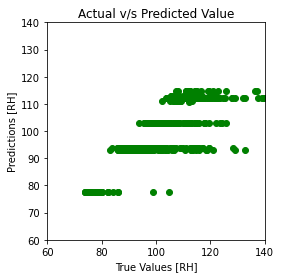

In [64]:
#Plotting Actual V/s Predicted Value
plt.scatter(y_test, preds,color = "Green")
plt.xlabel('True Values [RH]')
plt.ylabel('Predictions [RH]')
plt.grid(False)
plt.axis('equal')
plt.axis('square')
plt.xlim(60,140)
plt.ylim(60,140)
plt.title("Actual v/s Predicted Value")
plt.show()

## Question-4 :Predict your test_df values using XGBoost.

In [65]:
ActTestData=FinalTestData[['X189','X315','X314','X118','X261','X29','X127','X236']]
ActTestData.head()

,X189,X315,X314,X118,X261,X29,X127,X236
ID,,,,,,,,
1,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
5,1,0,1,1,1,0,0,0


In [66]:
ActTestData.describe()

,X189,X315,X314,X118,X261,X29,X127,X236
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,0.921834,0.025422,0.448325,0.622238,0.437871,0.038964,0.486101,0.000238
std,0.268464,0.157421,0.497382,0.484885,0.496184,0.193532,0.499866,0.015414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
##Prediction on Actual Data
ActualTestPred = xgb_mymodel.predict(ActTestData)

In [68]:
ActualTestPred

array([ 77.410965,  93.83903 ,  77.410965, ...,  93.179054, 112.0005  ,
        93.83903 ], dtype=float32)

In [69]:
TestID = np.array(testdata['ID'])
FinalPred = pd.DataFrame({'ID': TestID, 'y': ActualTestPred})
FinalPred.head()

,ID,y
0,1,77.410965
1,2,93.839027
2,3,77.410965
3,4,77.410965
4,5,112.000504


In [70]:
##Save the predicted values
FinalPred.to_csv('TestDataSubmission.csv', index=False)